# 158.755 Data Science - Making Sense of Data Project 4
# Study In Recommender Engine

## 1.0 Abstract

A recommender system, or a recommender engine intends to seek prediction of 'rating' or 'preference' for a user that would rank an item or event, mainly used in commercial web applications, which is the product of the rapid development of the Internet (especially the mobile Internet) plus the amount of data is increasing day by day. People feel more and more helpless in the face of massive data. Thus, people have proposed a recommender system in order to solve the problem of information overload. 

The recommender system is a technical mean for asssiting users finding their interested information in accordance with the massive amount of information when their real needs are not clear. It has integrated user preference data such as region, age gender etc., and their historical behaviour records like purchasing, clicking, rating items etc. so as to generate a list of accurate personalized recommended items to users that they might be interested in.

They have been utilized in various areas over the last ten years, commonly used as playlist generators for video and music services such as YouTube, Netflix, and Apple Music, product recommenders like Amazon, TradeMe, and eBay, and content or news based recommenders for social media platforms as Facebook, Twitter and Instergram. Also, there are other popular recommender systems being utilized for specific topics as hotels booking, dating matching, and online competition game team up.

Flow and monetization are the core concept associated with commercial web applications for internet. Simply speaking, flow is the measurement that the number of visiting for a web application, while monetization evaluates its overall income for keeping the business up and running continuously and healthily. (i.e. advertisement income of YouTube, membership subscriptions for Netflix, and fees/charges for each successfully sale for Amazon ). 

Therefore, recommender engine is one of the key part for monetization that allows finding consumers' real demand through directing them to their most interest items or services. In addition to this , owners of commercial web applications, would be able accurately deploy advertisements and services to their customers based on a successful recommendation engine set up, for example ,playlist generators (YouTube) could generate just right advertisements to their viewers , and product recommenders like Amazon could pushed customers related products when they are viewing a certain item. Thus, it would optimise the resource usage and amplify income for a commercial organisation who has developed such kind of commercial web applications. 

In this project , we would implement a ***'breath first'*** strategy so as to explore as much lifecycle and implementations for a recommendation engine , such as the input and output data structure, machine learning algorithms, evaluation standard for comparison of different algorithms, and its position and role in architecture of a commercial web applications , instead of undertaking ***in-depth*** research on specific algorithms as per their theory and implementations. Thus, we will simply use an existing library to compute our findings and recommendations for this project.


## 2.0 Introduction

In this report, section 3 has presented the essentials with dataset format for a recommender system, web API and crawling data source for this project.

In section 4 , we have implemented exploratory data analysis (EDA) for the dataset collected from section 3.

In section 5 , a third party library (SurPRISE) has been introduced to implement recommender engine's machine learning processes , input data structure with Collaborative Filtering models and benchmarks for their performance measures have also been discussed. 

In section 6 and 7We have implemented 3 x Matrix Factorization-Based Modules and 3 x Similarity Modules and compared with their results as per performance measures discussed in section 5.

The usage of trained recommender engine models has two approaches for Top N recommended items, which are prediction based and similarity based, that has been demonstrated in section 8.

In section 9 , the recommender engine's role and function in a commercial web app with distributed and decentralized system architecture has been discussed.

In section 10 , we have also developed a simple web app with client server architecture in order to demonstrate the content of section 9, its file structure and boot methods have been shown in this section as well.







## 3.0 Data Collection

### 3.1 Dataset Format

Normally, user activates for a commercial web app could be concluded as viewing a certain web page , purchasing products, comments and rank items , content or news etc. It is quite difficult to summarise a standard data structure for a recommendation engine due to the variety demands and requirements for various business activities.

However, a classic data structure format has been widely used after long term experimentation and operation with major internet giant companies such as Amazon and Facebook:

- ***user id*** : unique user id
- ***item id*** : unique item id
- ***behaviour type*** : type of behaviour , i.e. purchase or view an item
- ***context*** : behaviour context, including location and time etc.
- ***behaviour weight*** : weight could be the viewing length for a video or rank for an item 
- ***behaviour content*** : if a user comments something, the content could be saved as a text file. If user click an item, the content could be a binary input.


### 3.2 Web API Data Source

The datasets for a commercial web application have almost never been exposed for public usage or research, as they are private and strategy assets for business. Normally they are generated through user behaviour records, when they undertake activities on the website.

Fortunately, there are existing web source regarding recommendation engine study for us to play with , which is Amazon product data prepared by Associate Professor Julian McAuley, UCSD at http://jmcauley.ucsd.edu/data/amazon/.

Amazon Video games review data, http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz , has been selected as the dataset for this project. 


### 3.3 Web Crawling Data Source

In accordance with the dataset from web API as per section 3.1, it has item id / product id as a clue for us to search its relevant production information through technical means of web crawlers.  

Amazon official website has the production information mapped by item id of this dataset. However, it has a powerful anti-crawler mechanism to prevent users from maliciously accessing websites. Therefore, we are only able to get the video games name based on its item id for our case.

Thus, we have swapped to the third-party platform, which is a static web page to obtain more relevant information based on the item name obtained from Amazon official website.

Then , the process would be summarised as ***get item id from web api dataset (video games) -> web crawling item name from Amazon official website -> web crawling product information from third-party platform (i.e. igg-games.com)***

The Web Crawling code/function in ***report_helpers.ipynb*** file has demonstrated the implementation of this process.


In [2]:
%run report_helpers.ipynb #import heler functions

## 4.0 Exploratory Data Analysis (EDA)

In accordance with the dataset as per section 3.2.

In [32]:
data = pd.read_json('./datasets/reviews_Video_Games_5.json', lines=True)

This dataset storage structure is simple and records 231780 user reviews. The 'reviewerID' is the user ID, and the 'asin' is the item ID. The 'overall' is the user's score for the product.

In [12]:
print(data.shape)
data.head(3)

(231780, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"


The data records a total of 24303 user evaluation behaviours, which included 10672 products. The evaluation score ranges from 1 to 5 and average user rating of the dataset is 4.08.

In [13]:
print("users:",len(data['reviewerID'].unique()))
print("items:",len(data['asin'].unique()))
print("mean:",data['overall'].mean())

users: 24303
items: 10672
mean: 4.086396582966606


The bar chart below shows that most users have given higher scores. It can be seen from here that users are satisfied with most products.

Text(0.5, 1.0, 'Rating scores')

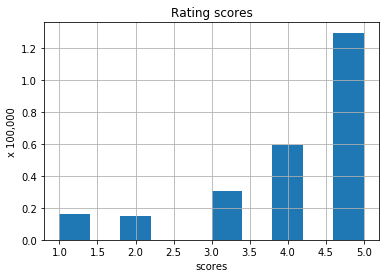

In [37]:
data['overall'].hist(bins = 10,histtype = 'bar',normed =True)
plt.xlabel('scores') 
plt.ylabel('x 100,000') 
plt.title("Rating scores")

In [35]:
data [ data['overall'] == 1 ]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
7,AQTC623NCESZW,0700099867,Chesty Puller,"[1, 4]",I can't tell you what a piece of dog**** this ...,1,Crash 3 is correct name AKA Microsoft,1353715200,"11 24, 2012"
13,A248LSBZT4P38V,0700099867,Joseph R. Kennedy,"[0, 0]",I bought this and the key didn't work. It was...,1,"It might have been a good game, but I never fo...",1404086400,"06 30, 2014"
14,AFS6WERAP409A,0700099867,"Lisa Gamuciello ""Lisa G.""","[0, 0]",Crashed in Vista. Codemasters told me they do...,1,Don't waste your money,1367280000,"04 30, 2013"
...,...,...,...,...,...,...,...,...,...
231774,A1V6WWYN2S6V40,B00KHECZXO,Anthony G. Nguyen,"[104, 109]",The real Mario Kart 8 Wii U bundle is a red bo...,1,This is a scam! Not a real bundle.,1401494400,"05 31, 2014"
231776,A3VVMIMMTYQV5F,B00KHECZXO,Johnny Saigon,"[8, 11]",All this is is the Deluxe 32GB Wii U with Mari...,1,Get the Other Bundle Which Includes Extra Whee...,1403308800,"06 21, 2014"
231777,A1DD4B97M4DUC5,B00KHECZXO,migit,"[62, 66]",The package should have more red on it and sho...,1,Fake bundle,1401321600,"05 29, 2014"
231778,A2Q9CNJ4T6ZK99,B00KHECZXO,"Philip Brown ""Philip & Chana""","[33, 36]",Can get this at Newegg for $329.00 and the pac...,1,Looks Like We Have Gougers Again.,1401667200,"06 2, 2014"


In terms of the situation of user praise, we selected the top 5 items with the most favourable comments from users. Among them, "B00BGA9WK2" received 2,855 users 5 points praise. Through the web crawling, we could know that the product is "PlayStation 4 500GB Console".

,overall,unixReviewTime
asin,,
B00BGA9WK2,2855,793119600000
B0015AARJI,2515,672382598400
B007CM0K86,2035,561753273600
B002VBWIP6,1995,544925404800
B000B9RI14,1865,502394745600


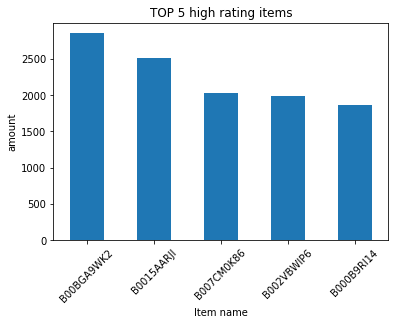

In [15]:
top_5_items = data[data['overall']==5].groupby('asin').sum().sort_values(by="overall",ascending=False).head()
# top_5_items.plot()
top_5_items['overall'].plot.bar()
plt.ylabel("amount")
plt.xlabel("Item name" )
plt.xticks(rotation=45)
plt.title("TOP 5 high rating items")
(top_5_items)

Code below shows that we obtain five products with the lowest ratings from existing users . The item "B000FKBCX4" has score of 1 point rated by 151 users. Through the web crawling, we could find that the product is a game named "Spore - PC/Mac."  

,overall,unixReviewTime
asin,,
B000FKBCX4,151,184973328000
B00178630A,141,189243388800
B007FTE2VW,125,170573126400
B007VTVRFA,104,141888672000
B00BGA9WK2,64,88793971200


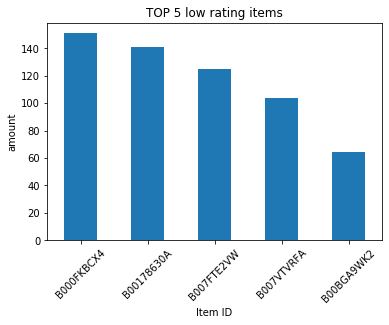

In [31]:
top_5_items = data[data['overall']==1].groupby('asin').sum().sort_values(by="overall",ascending=False).head()
# top_5_items.plot()
top_5_items['overall'].plot.bar()
plt.ylabel("amount")
plt.xlabel("Item ID" )
plt.xticks(rotation=45)
plt.title("TOP 5 low rating items")
(top_5_items)

Before we start analysing the product score, we want to explore the behaviour for evaluation. Some of the users have rated multiple products, and we consider such users as active users who have tried different products for different reviews being precious. Also, it contains a lot of personal preference information. The five users with the most rating times are as below.

In [17]:
data['reviewerID'].value_counts().head()

A3V6Z4RCDGRC44    773
AJKWF4W7QD4NS     635
A3W4D8XOGLWUN5    456
A2QHS1ZCIQOL7E    450
A29BQ6B90Y1R5F    404
Name: reviewerID, dtype: int64

Now we only select the most active users as an example. This active user has rated it 773 times in this dataset. Moreover, there is no repeating rating of a product.

In [18]:
active_user= data[data['reviewerID']=="A3V6Z4RCDGRC44"]
print(active_user['asin'].duplicated().all())
active_user.head(3)

False


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1400,A3V6Z4RCDGRC44,B00000INR2,"Lisa Shea ""be the change you wish to see in t...","[111, 112]",The expansion pack beefs up the graphics capab...,5,A must-have for any serious Nintendo player,972950400,"10 31, 2000"
2051,A3V6Z4RCDGRC44,B00000JRSB,"Lisa Shea ""be the change you wish to see in t...","[18, 26]",Final Fantasy VII was the first release for th...,5,Still great after all these years,1050710400,"04 19, 2003"
2244,A3V6Z4RCDGRC44,B00000K125,"Lisa Shea ""be the change you wish to see in t...","[1, 1]",Soul Calibur is the classic version of the arc...,5,Still fun after all these years,1103414400,"12 19, 2004"


The figure below shows the distribution of the scores of this active user. It can be seen that the user compares 773 products horizontally, and most products give 4-5 points. The information of these active users is could be outliers or commercial users for future analysis.

Text(0.5, 1.0, 'Most active user rating scores')

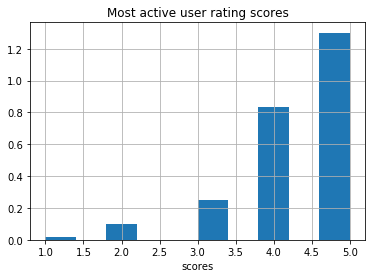

In [19]:
active_user['overall'].hist(bins = 10,histtype = 'bar',normed =True)
plt.xlabel('scores') 
plt.title("Most active user rating scores")

## 5.0 Algorithm Research

As there are many approaches to implement recommender engine, such as Collaborative filtering, Content-based filtering, Multi-criteria recommender systems etc. Their brief concept and implementations could be refer to 
https://en.wikipedia.org/wiki/Recommender_system.

In this project , we would use an existing library named as ***SurPRISE***, stands for ***Simple Python RecommendatIon System Engine.***,http://surpriselib.com/.

As it has provided various ready-to-use prediction algorithms with good documentation and use cases, such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.

In this project ,we will mainly focus on ***Collaborative filtering*** based algorithms ,***matrix factorization-based modules and similarity modules***.


### 5.1 Collaborative Filtering Introduction

It is based on the assumption if a user agreed in the past, he will also agree in the future, such as they will like similar kinds of items as they liked in the past. Thus, the system could generate recommendations by searching peer users and items with a rating history similar to the current user or item in order to generate recommendations using this neighbourhood.

A key advantage of the collaborative filtering approach is that it only requires a user-item matrix with rating input, and it is capable of recommending complex items accurately, such as movies, music without requiring any knowledges of the item itself.


### 5.2 Input Data Structure

The input data structure is very simple , just a big user - item with rating matrix sourced from original dataset in section 3.2, that is represented as a specific user ranks an item with certain rating as per the code below:

In [22]:
#create itemId rating , userID, timestamp fields
data['itemID'] = data['asin'] 
data['rating'] = data['overall'] 
data['userID'] = data['reviewerID'] 
data['timestamp'] = data['unixReviewTime'] 
#save as full_dataset.csv
data = data.drop(data.columns[0:9], axis=1)
data.to_csv('full_dataset.csv', encoding='utf-8', index=False)

In [25]:
#full dataset for research
df = pd.read_csv('full_dataset.csv')

In [26]:
df.head()

,itemID,rating,userID,timestamp
0,0700099867,1,A2HD75EMZR8QLN,1341792000
1,0700099867,4,A3UR8NLLY1ZHCX,1372550400
2,0700099867,1,A1INA0F5CWW3J4,1403913600
3,0700099867,3,A1DLMTOTHQ4AST,1315958400
4,0700099867,4,A361M14PU2GUEG,1308009600


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 4 columns):
itemID       231780 non-null object
rating       231780 non-null int64
userID       231780 non-null object
timestamp    231780 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.1+ MB


### 5.3 Performance measures

The commonly used metrics are the ***Mean Absolute Error (MAE)*** and ***Root Mean Squared Error(RMSE)***,  ***precision*** and ***recall*** will also be used to evaluate the quality of a model for comparison. 

However, these classic evaluation measures are highly criticized. It has been seen that results of offline measures have low correlation with results from user activities or online tests (A/B tests). This is probably because the online recommender engine is a static model as the user behaviour being updated continuously.

In this project ,we would just use classic evaluation measures to compare different machine learning models since we don't have real online environment to implement A/B tests.


##  6.0 Matrix Factorization-Based Modules

### 6.1 SVD

The famous SVD algorithm, which was popularized by Simon Funk during the Netflix Prize in 2006. Its documentation and reference could be referred to links as below:

https://sifter.org/~simon/journal/20061211.html

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

SVD is stand for singular value decomposition mathematically, is a factorization of a real or complex matrix that generalizes the eigen decomposition of a square normal matrix to any m × n matrix via an extension of the polar decomposition. 

Actually , it is dry and headache to focus on the mathematical details for this algorithm, ***SurPRISE*** lib has encapsulated ready to use functions to implement this approach.

The code below has followed a standard machine learning process , which has iterated through all combinations of parameters in ***param_grid*** variable with K folds method (3 folds), so as to find the best prediction model based on RMSE and MAE score.

***{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}*** parameters have been found as the best score model for this approach



In [9]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

In [10]:
df = pd.read_csv('full_dataset.csv')
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [2]:
#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_all': [0.002, 0.005,0.01],
              'reg_all': [0.2, 0.4, 0.6]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.026267071934603
best MAE score
0.761404237027621
combination of parameters that gave the best RMSE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}
combination of parameters that gave the best MAE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}


Once the best SVD model has been selected , the ***precision@k and recall@k*** could be computed with 5 folds method. As their results are very close, we could justify that data are distributed with not much outliers.

In [3]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1
    

precision@k for folder 0
0.9048545025109515
recall@k for folder 0
0.8115955212411249
precision@k for folder 1
0.905355953228735
recall@k for folder 1
0.8102013341283134
precision@k for folder 2
0.9056486204942034
recall@k for folder 2
0.8119031242068613
precision@k for folder 3
0.9030259586344004
recall@k for folder 3
0.8124310026279398
precision@k for folder 4
0.9055092241597175
recall@k for folder 4
0.8107083060070126


We can use the code below to save this model for future reuse.

In [15]:
#save the model for later use
dump.dump(os.path.expanduser("SVD_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.2 SVD++

The SVD++ algorithm, an extension of SVD taking into account implicit ratings. When a user rated a product, it means that he has used the product. Such behaviour contains specific information. So we can understand the problem as follows: the behaviour of the rating reflects the user's preferences from the side, such a reflection can be reflected in the model in the form of implicit parameters, thereby obtaining a more refined model, which is SVD++. 

Study shows that social popularity based SVD++ Recommender System may be such a technology in most of the cases. 
https://research.ijcaonline.org/volume87/number14/pxc3894033.pdf


The following code has followed a standard machine learning process that is same as section 6.1, 
***{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}*** parameters have been found as the best score model for this approach



In [4]:
from surprise import SVDpp
#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_all': [0.002, 0.005,0.01],
              'reg_all': [0.2, 0.4, 0.6]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.0259890643225946
best MAE score
0.7613404967074854
combination of parameters that gave the best RMSE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}
combination of parameters that gave the best MAE score
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}


We can view the ***precision@k and recall@k*** results with 5 folds method, and they are very close as well.

In [5]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

precision@k for folder 0
0.9035992785325058
recall@k for folder 0
0.8128450908006942
precision@k for folder 1
0.9049108853232803
recall@k for folder 1
0.8137502541679952
precision@k for folder 2
0.9054113595406106
recall@k for folder 2
0.8117695353329721
precision@k for folder 3
0.9063827996480381
recall@k for folder 3
0.8087806628604025
precision@k for folder 4
0.9044552063681974
recall@k for folder 4
0.811729913179309


Lastly, save the model for future use.

In [6]:
dump.dump(os.path.expanduser("SVDpp_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.3 NMF

It is standards for Non-negative matrix factorization, which is very similar to SVD. The application of non-negative matrix factorization is more and more extensive, and the scope of application includes text dimensionality reduction, topic extraction, and image processing, and so on.

Through limiting the matrix decomposition, it cannot be a negative matrix, which leads to the classic matrix decomposition method in the recommendation system that can achieve excellent prediction performance. However, it cannot make recommendation interpretations that are consistent with people's habits like User-based Collaborative Filtering (Even people with similar tastes also bought this product) , in accordance with http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf


The following code has followed a standard machine learning process, 
***{'n_epochs': 5, 'lr_bu': 0.02, 'reg_bu': 0.02}*** parameters have been found as the best model based RMSE score , and ***{'n_epochs': 5, 'lr_bu': 0.03, 'reg_bu': 0.01}*** parameters was the best score based on MAE score.



In [7]:
from surprise import NMF
#choose various parameters for model
param_grid = {'n_epochs': [5, 10,15], 'lr_bu': [0.01,0.02,0.03],
              'reg_bu': [0.01, 0.02,0.03]}

#iterate thorugh parameter grid to find best model
gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print('best RMSE score')
print(gs.best_score['rmse'])
print('best MAE score')
print(gs.best_score['mae'])
# combination of parameters that gave the best RMSE score
print('combination of parameters that gave the best RMSE score')
print(gs.best_params['rmse'])
print('combination of parameters that gave the best MAE score')
print(gs.best_params['mae'])

best RMSE score
1.0918311387798603
best MAE score
0.7252425552729814
combination of parameters that gave the best RMSE score
{'n_epochs': 5, 'lr_bu': 0.02, 'reg_bu': 0.02}
combination of parameters that gave the best MAE score
{'n_epochs': 5, 'lr_bu': 0.03, 'reg_bu': 0.01}


In [8]:
kf = KFold(n_splits=5)
#best algo based on above
algo = gs.best_estimator['rmse']
i = 0
#print precision@k and recall@k
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

precision@k for folder 0
0.9081323481041224
recall@k for folder 0
0.7710294534102277
precision@k for folder 1
0.9075895518965293
recall@k for folder 1
0.771405544887086
precision@k for folder 2
0.9076822139588987
recall@k for folder 2
0.7758348886866585
precision@k for folder 3
0.9086472339902996
recall@k for folder 3
0.7782920823361338
precision@k for folder 4
0.9072819207484867
recall@k for folder 4
0.7714442934777486


In [10]:
dump.dump(os.path.expanduser("NMF_GS_BEST_RMSE"), algo=gs.best_estimator['rmse'])

### 6.4 Comaprison With Matrix Factorization-Based Modules

The table below has list the bench marks for evaluation of three algorithms in this section, ***SVD++*** has the top rank based on the analysis from section 6.1 - 6.3

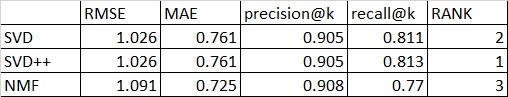


## 7.0 Similarity Modules

### 7.1 Cosine 

Since there are not many parameters to be tested for a similarity module, we can simple set up model and cross validate them with K folds, the code below computes the RMSE and MAE result plus their fit and test running time.
As RMSE and MAE results are similar for 5 folds, we can specify that there are not much skewness for the dataset.

The documentation for Cosine Similarity could be referred to https://surprise.readthedocs.io/en/stable/similarities.html.


In [12]:
df = pd.read_csv('full_dataset.csv')
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))
df = df [0:len(df):20]
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

sim_options = {'name': 'cosine', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1843  1.1533  1.1605  1.1491  1.1545  1.1603  0.0125  
MAE (testset)     0.9285  0.9012  0.8993  0.9041  0.9002  0.9067  0.0111  
Fit time          7.53    6.76    6.13    5.91    5.77    6.42    0.65    
Test time         0.25    0.05    0.03    0.04    0.04    0.08    0.08    


{'test_rmse': array([1.18429724, 1.15329305, 1.16050375, 1.14907944, 1.15454086]),
 'test_mae': array([0.92854331, 0.90119556, 0.89926426, 0.90413285, 0.90020007]),
 'fit_time': (7.5255937576293945,
  6.760912895202637,
  6.133089780807495,
  5.912189483642578,
  5.765178918838501),
 'test_time': (0.2533395290374756,
  0.0507206916809082,
  0.032510995864868164,
  0.04471731185913086,
  0.040404319763183594)}

We can also view their ***precision@k and recall@k*** could be computed with 5 folds. Also their results are very close.

In [6]:
kf = KFold(n_splits=5)

sim_options = {'name': 'cosine', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8972336797474505
recall@k for folder 0
0.7894170755786297
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8965940148365921
recall@k for folder 1
0.7887532228174912
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8953241833360075
recall@k for folder 2
0.7938544364888187
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8972271393212107
recall@k for folder 3
0.7900970338754776
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8977145582904051
recall@k for folder 4
0.7926231123169162


Lastly , save the model on local disk for future reuse.

In [24]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_COSINE"), algo=algo)

### 7.2 MSD

Compute the Mean Squared Difference similarity between all pairs of users (or items). The angle considered by MSD is the degree of gap between two users on the same production. Mean square error, the smaller the value, the higher the similarity between the two users.

The 5 folds method below has shown close RMSE and MAE results as well. 

In [19]:
sim_options = {'name': 'MSD'} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1360  1.1336  1.1537  1.1467  1.1570  1.1454  0.0093  
MAE (testset)     0.8828  0.8814  0.8930  0.8928  0.8906  0.8881  0.0050  
Fit time          21.48   27.31   22.30   23.24   19.16   22.70   2.67    
Test time         2.63    5.49    0.38    0.29    0.24    1.81    2.05    


{'test_rmse': array([1.13599701, 1.13363888, 1.15374848, 1.14666775, 1.15702022]),
 'test_mae': array([0.88284042, 0.88136329, 0.89303263, 0.89279828, 0.89063554]),
 'fit_time': (21.482598304748535,
  27.30842423439026,
  22.300490140914917,
  23.240918397903442,
  19.16305136680603),
 'test_time': (2.630727529525757,
  5.493117570877075,
  0.37982630729675293,
  0.2926371097564697,
  0.2430715560913086)}

We can also view their ***precision@k and recall@k*** could be computed with 5 folds. Also their results are very close.

In [22]:
kf = KFold(n_splits=5)

sim_options = {'name': 'MSD', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8134772546467058
recall@k for folder 0
0.9491514187218244
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8203731939301532
recall@k for folder 1
0.9502572320585825
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8250599781897492
recall@k for folder 2
0.9467056135431271
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8256843625857709
recall@k for folder 3
0.9519847288861373
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8158126181130979
recall@k for folder 4
0.9547826718999854


Lastly, save the model for future use.

In [13]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_MSD"), algo=algo)

### 7.3 Pearson

Compute the (shrunk) Pearson correlation coefficient between all pairs of users (or items) using baselines for centering instead of means.

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations. The form of the definition involves a "product moment", that is, the mean (the first moment about the origin) of the product of the mean-adjusted random variables; hence the modifier product-moment in the name, as per https://surprise.readthedocs.io/en/stable/similarities.html.

Aslo , the 5 folds method below has shown close RMSE and MAE results. 



In [24]:
sim_options = {'name': 'pearson', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1689  1.1552  1.1569  1.1645  1.1546  1.1600  0.0057  
MAE (testset)     0.9121  0.9028  0.9035  0.9126  0.9003  0.9063  0.0051  
Fit time          6.63    6.86    6.50    6.84    6.98    6.76    0.17    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.00    


{'test_rmse': array([1.16887205, 1.1552452 , 1.1568599 , 1.16450939, 1.1546434 ]),
 'test_mae': array([0.91213912, 0.90281732, 0.90347463, 0.91255526, 0.9003046 ]),
 'fit_time': (6.631256818771362,
  6.856691122055054,
  6.504576683044434,
  6.835744142532349,
  6.9752137660980225),
 'test_time': (0.037899017333984375,
  0.036899566650390625,
  0.03789806365966797,
  0.04185605049133301,
  0.038863420486450195)}

We can also view their ***precision@k and recall@k*** could be computed with 5 folds. Also their results are very close.

In [25]:
kf = KFold(n_splits=5)

sim_options = {'name': 'pearson', 'user_based': True} # or item based
algo = KNNBaseline(sim_options=sim_options)
i = 0

#print precision@k and recall@k
for trainset, testset in kf.split(data):
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print('precision@k for folder ' + str(i) )
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall@k for folder ' + str(i) )
    print(sum(rec for rec in recalls.values()) / len(recalls))
    i += 1

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 0
0.8158300738809214
recall@k for folder 0
0.9580733532004718
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 1
0.8260174102285093
recall@k for folder 1
0.9514689880304679
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 2
0.8216140732680449
recall@k for folder 2
0.948627908181771
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 3
0.8268075319821762
recall@k for folder 3
0.949566982894926
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
precision@k for folder 4
0.8195595290013084
recall@k for folder 4
0.9485277829695623


Lastly, save mode for future use.

In [26]:
#save the model for later use
dump.dump(os.path.expanduser("KNN_PEARSON"), algo=algo)

### 7.4 Comparison with Similarity Modules

The table below has list the bench marks for evaluation off three algorithms, ***Cosine*** has the top rank based on the analysis from section 7.1 - 7.3
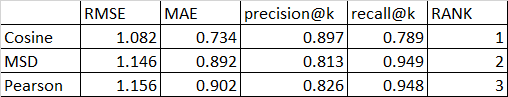

## 8.0 Top N Recommender 

### 8.1 Get Top N Items 

This approach is based on the top-10 items with highest rating prediction for each user in the dataset. The input could be user rating to different items (i.e. 20 items), then, it will return top 10 best prediction items.

Below is a simple example showing the input and output for the top 10 items with ID and prediction value recommended for a user based on its prediction model


In [35]:
#load dataset and algorithm
df = pd.read_csv('full_dataset.csv')
_, prediction_algo = dump.load(os.path.expanduser('SVD_GS_BEST_RMSE'))

# userID is 'ALOXOO497B4LH'
test = df[df['userID'] == 'ALOXOO497B4LH']
columnsTitles=["userID","itemID","rating"]
test=test.reindex(columns=columnsTitles)

predictions = prediction_algo.test(np.array(test))

top_n = get_top_n(predictions, n=10)
top_n # return is top 10 recommended items with highest prediction score

defaultdict(list,
            {'ALOXOO497B4LH': [('B00JSSP35C', 5),
              ('B0186D1TYS', 5),
              ('B018F6NSP4', 5),
              ('B01GW3LRD2', 4.9934516721914335),
              ('B0194VWTRM', 4.986915118031065),
              ('B00IFF0SIQ', 4.981101492897001),
              ('B0053BCO00', 4.966267966701362),
              ('B000X1TC0U', 4.953234172755904),
              ('B000X1TC0U', 4.953234172755904),
              ('B00DVPMVIU', 4.952126406293492)]})

### 8.2 Get the k nearest neighbors of a user (or item)

We can use the get_neighbors() methods of the algorithm object. This is only relevant for algorithms that use a ***similarity measure***, such as the k-NN algorithms with Cosine similarity function.

Below is an example where we retrieve the 10 nearest neighbours of one of the video games from the video game review dataset. The output is represented as 10 rows item ID from the dataset.



In [5]:
#load dataset and algorithm
df = pd.read_csv('full_dataset.csv')
_, knn_algo = dump.load(os.path.expanduser('KNN_MSD'))

#get inner id of user-item matrix
i = 0 
for item in df['userID'].unique():
    if item == 'A1JGAP0185YJI6':
        break
    i += 1
    
knn_neighbors = knn_algo.get_neighbors(i, k=10)

items = []
for e in knn_neighbors:
    items.append(df.iloc[int(e)]['itemID'])
items        

['9629971372',
 'B00000DMAT',
 'B00002STPG',
 'B000035Y6D',
 'B00004KHAG',
 '0700026657',
 '0700026657',
 '0700026657',
 '0700026657',
 '0700026657']

## 9.0 Recommender Engine in System Architecture 

In this section , we will explore the position and role of Recommender Engine in a commercial web app which has a decentralized and distributed architecutre as per security and stability focus.

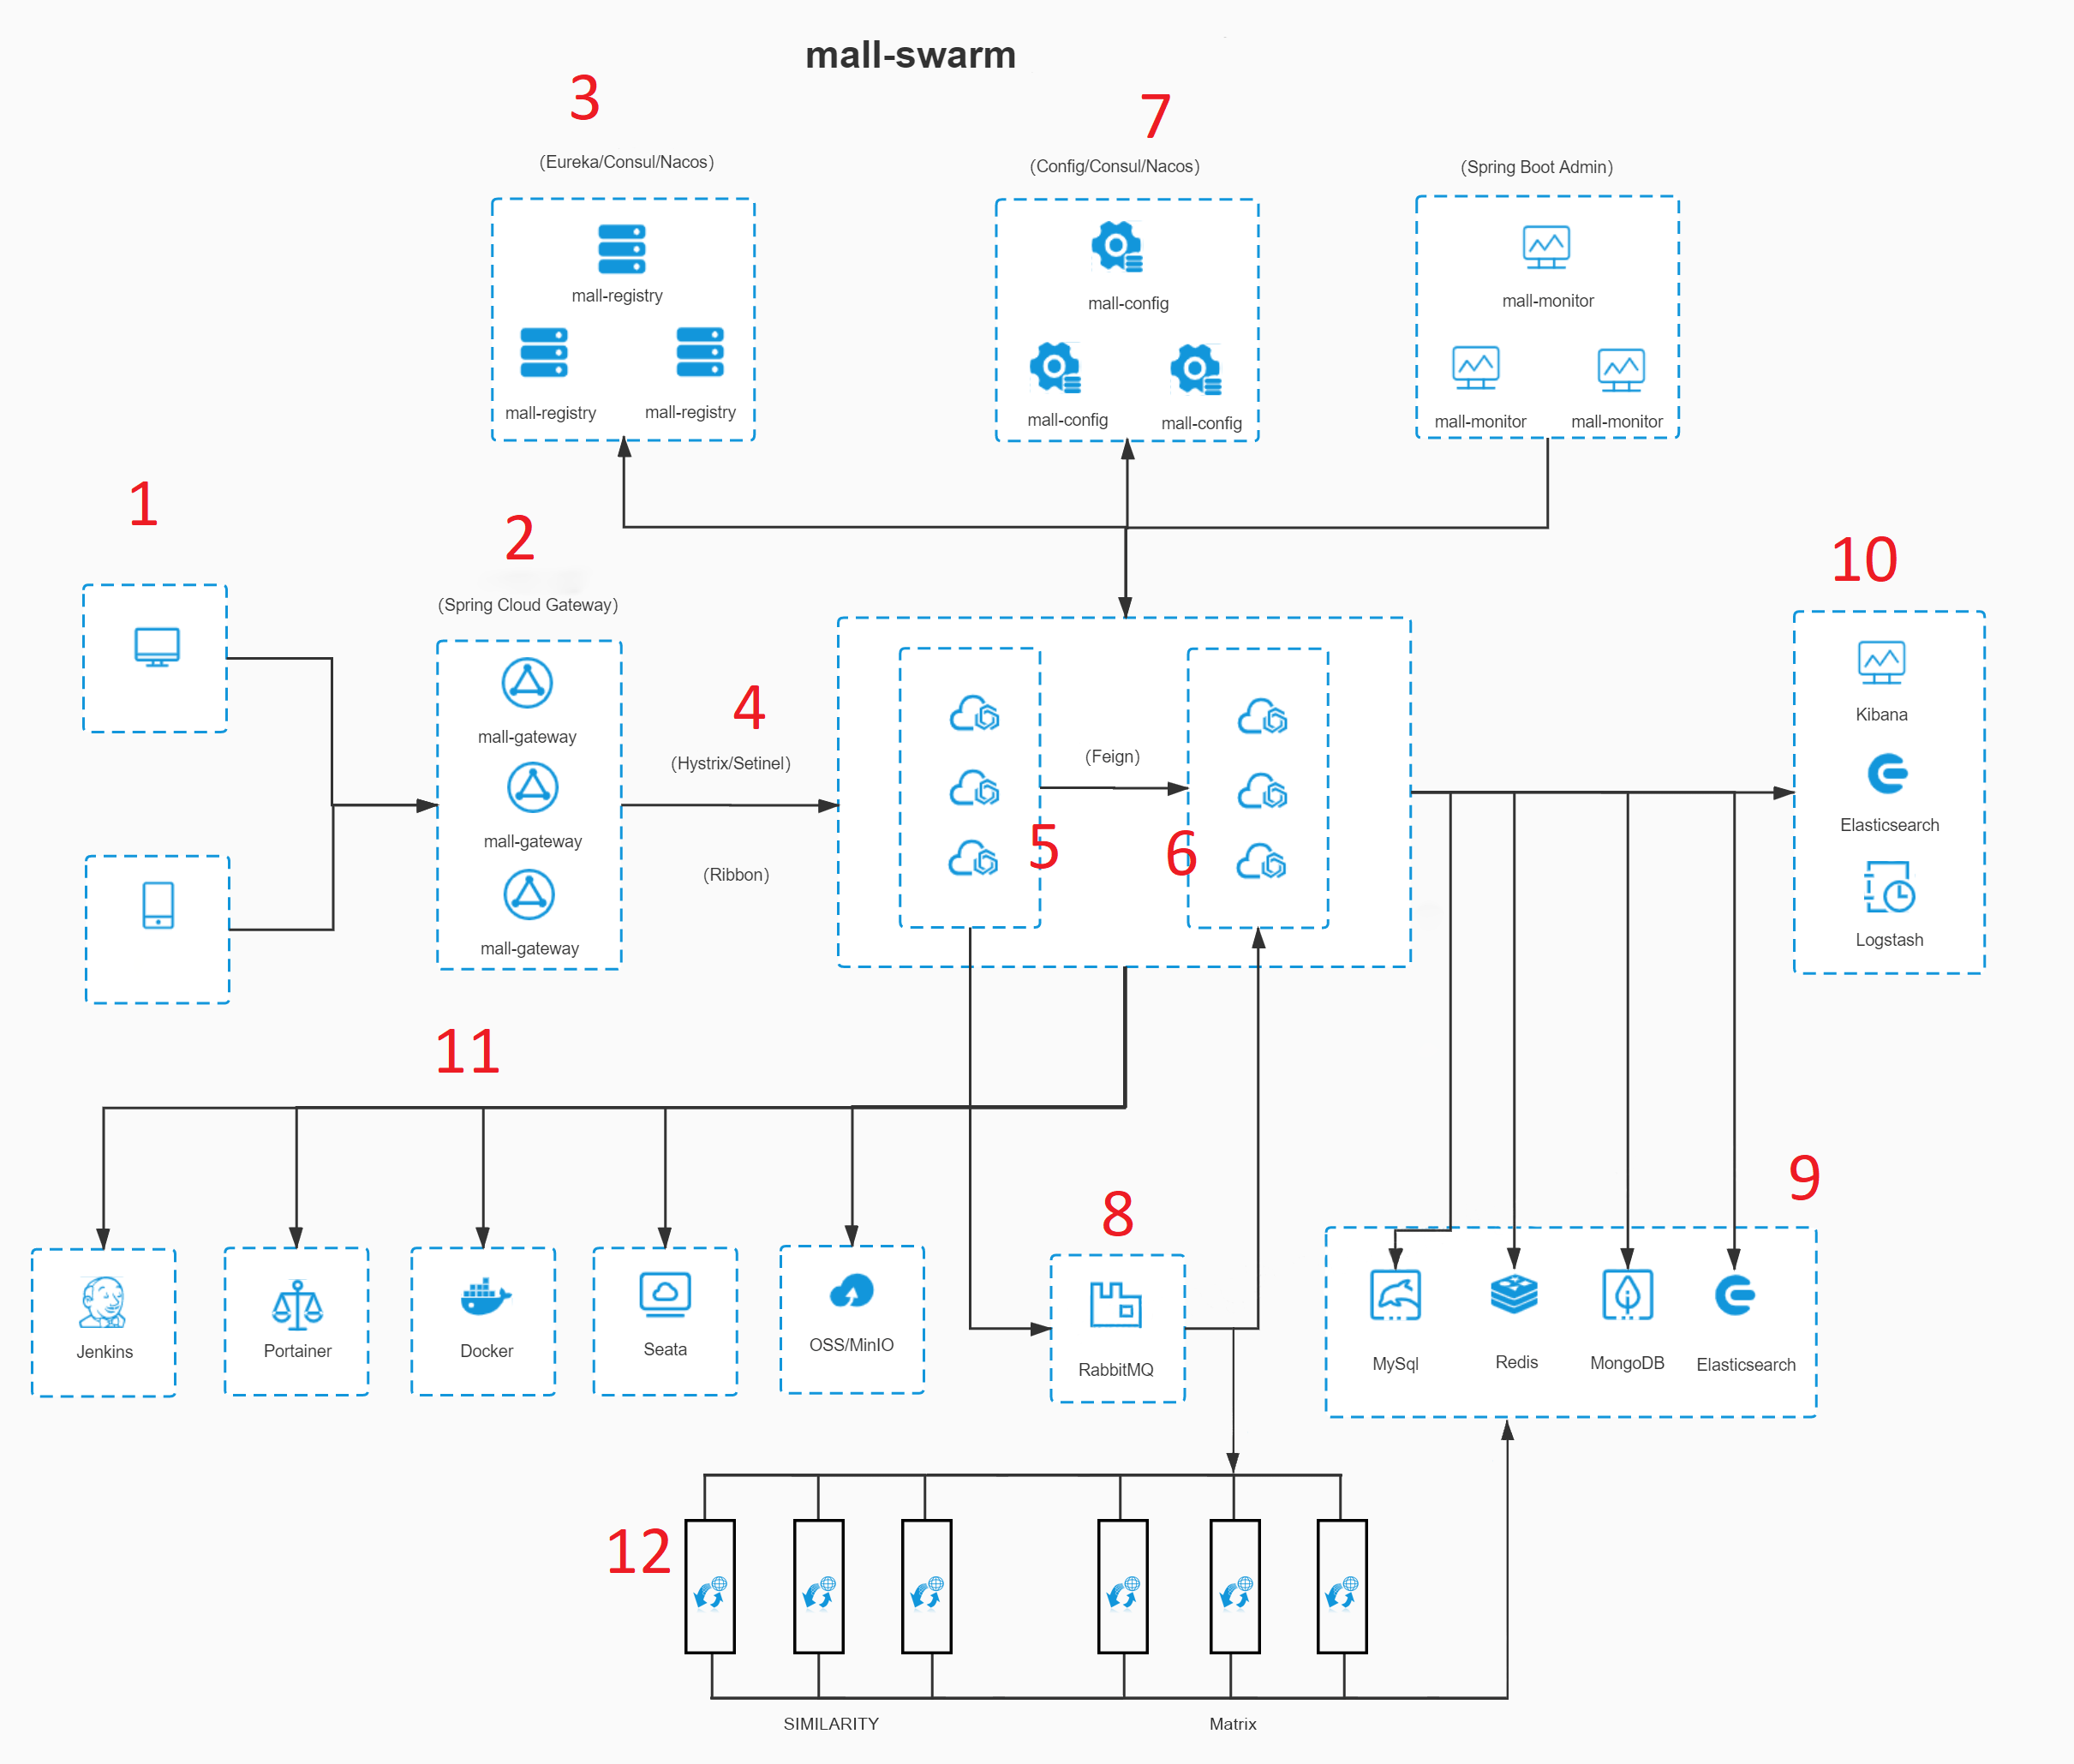

In accordance with this graph, this is a classic system architecture for a commercial web application, which can be seen operation system (i.e. Android, Mac) as well. 

It is based on technical stack Spring Framework in JAVA language, https://spring.io/.  The graph is sourced from ***mall*** , an open source online shop platform project with a distributed system architecture, https://github.com/macrozheng/mall. It has the following components:

***1 Web Clients*** - desktop or mobile devices that sending http requests.
 
***2 API gateway*** - it can take care of securing and routing messages, hiding services, and integrated with many other services in the system.

***3 Service registry*** - applications can’t always know the exact location of other services, if they need to make inter process communications, Service registry should be checked first to find other services addresses.

***4 Circuit breakers*** - distributed systems can be unreliable. Requests might encounter timeouts or fail completely. In high concurrency environment, it could provide function to throttling load.

***5 Load Balancers*** - it provides functions that load requests evenly to different services with same functions, that improves stability to the system. 

***6 Microservices*** - building small and fine, self-contained, ready to run applications, that can bring great flexibility and added resilience to the system. It is a modern approach to software whereby application code is delivered in small, manageable pieces, weak coupling with others, which can lead to many additional benefits, such as easier maintenance, improved productivity, greater fault tolerance, better business alignment, and more. 

***7 Cloud configuration*** - normally configuration can’t simply be embedded inside the application/micro services, while it has to be flexible enough to cope with multiple applications, environments, and service instances, as well as deal with dynamic changes without downtime in order to keep the configurations safe.

***8 Message Queues*** - a form of asynchronous service-to-service communication used in serverless and microservices architectures. Messages are stored on the queue until they are processed and deleted. Each message is processed only once, by a single consumer. Message queues can be used to decouple heavyweight processing, to buffer or batch work, and to smooth spiky workloads.

***9 Databases*** - store all the information and records, i.e. MySql,Redis.

***10 Log system*** - store all the operational logs/records that occur in the system for tracing.

***11 Deployment tools*** - deployment automation tool stack that containerizing services/apps in a sandbox/virtual machine and deploy them onto the real machine. As computers could have various operation systems, such as Linux / Mac/ Windows, this techniques assist engineers focus on business code and opertatons, instead of strugling with configurations on different machines.

***12 recommender engine microservices*** - Our recommender engine would include some microservices being embedded in this complex system, which is connected with all the components as above. However, it has weak coupling with other microservices.

A typical process would be that a request needs to be checked at ***API gateway*** for its security/identification, secondly, it looks up the ip address of recommender engine cluster at ***Service registry***, then it is forwarded onto one of recommender engine server through message queue and load balancer system for processing , and lastly, the recommended items of this request are returned to the front end browser for viewing and recorded at the ***Log system*** for maintenance and debugging purpose.

In terms of recommender engine cluster, Availability and Partition tolerance have been implemented in accordance with ***CAP theorem***, which implies that in the presence of a network partition, one has to choose between consistency and availability, as per https://en.wikipedia.org/wiki/CAP_theorem. 

In this case, we have pushed a static model and database for online recommender engine, which makes the system stateless. Thus, its microservices could be parallel duplicated as much as we needs in order to deal with fault tolerance and high concurrency situation through load balancers and messge queues, i.e. Black Friday Sales or Shopping Holidays for famous commercial web apps such as Amazon , eBay, Taobao, Alibaba etc. Those events might have very high concurrency data flows and user activities.

Also, the online environment and database are updating dynamically, we need gap to train and test both online and offline models so as to undertake research and improvements.

Therefore, Availability and Partition tolerance (AP) is the most common choice as the system architecture of recommender engines.




## 10.0 Web App Development  

In accordance with section 9 for the recommender engine architecture, we have developed a simple web app to present its key process and functions upon a client and server architecture. 

All its resources, Javascript code, HTML file, server side code (Flask) etc. have been packaged inside ***RS_demo.zip*** file. This will also be demonstrated in ***project presentation section***.

### 10.1 UI Design

Before starting coding process for our web app, UI design is crucial in order to set up the major framework. Our web app needs to clearly and elegantly show overall process of recommender engine. Thus, the web page is going to be divided into two parts only, while the entire webpage is made by using HTML, CSS, JavaScript, bootstrap4 and jQuery for front end section and light weight Flask framework as the back end technical stack.

Initially, a mock up drawing has been draft by hand drawing as below. The top part is designed for logo, title and response time from the server. The left part of the drawing shows that after input of user id and search function, the recommender engine will response top N video games that recommended to the user when the 'submit' button been clicked. Lastly, the right part has occupied most of the entire web page, which would be used to demonstrate system architecture for it.

Then, we could start with development of front and back end code in terms of this UI design.


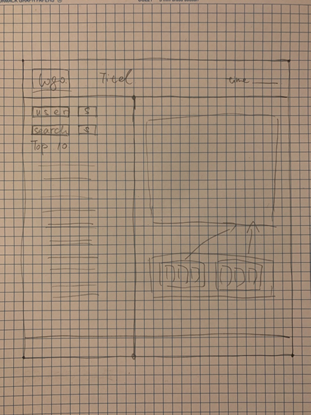



### 10.2 Front End Code

The front end code with HTML file , resources and Javascript code are inside ***front-end*** folder. Click and open ***index.html*** that can open the user interface.

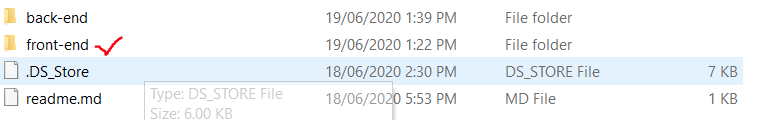

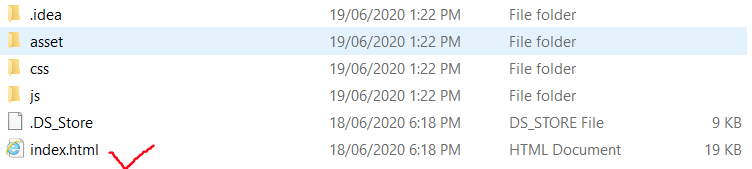

The web app has the following components as per the web page screen shot below, which is slightly different with the initial UI design:

***1 API to call Matrix Model*** -  it will interact with ***get_TopN_items_prediction(user_name)*** function provided by server, and return Top N prediction with minimum MSAE results based on Matrix Factorization-Based  model.

***2 API to call Similarity Model*** - it will interact with ***get_k_nearest_neighbour_by_item (user_name)*** function provided by server, and return k nearest neighbours of items recommended to a user based on similarity model.

***3 Recommended items*** - area for icons and messages represented as recommended items after response from server. 

***4 Web app system architecture*** - some key symbols and icons will be flashing to show the key process between client server interactions for recommender engine.


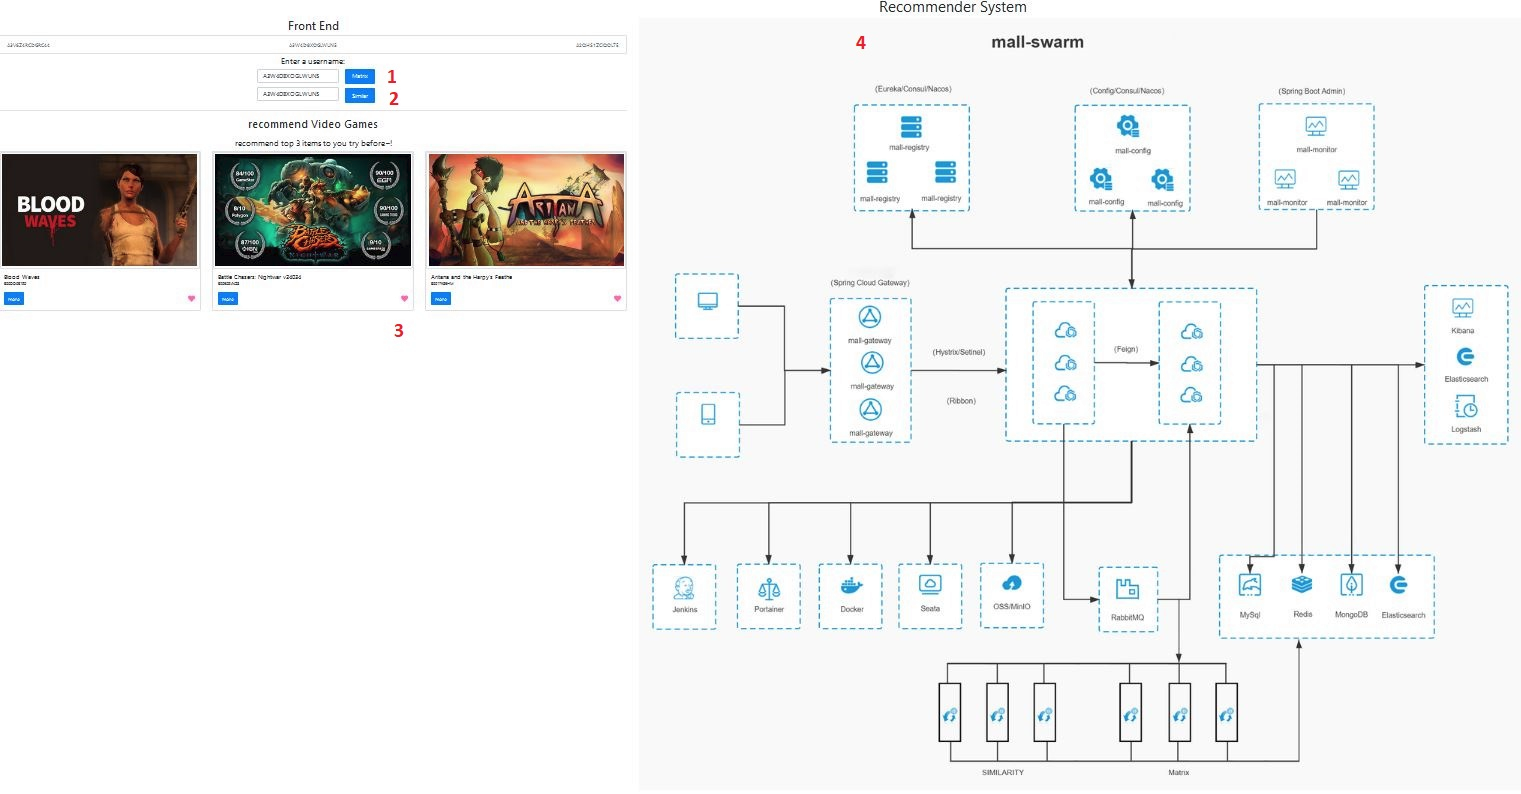

### 10.3 Back End Code

The server side code, test models and dataset have been included inside ***back-end*** folder. Server is written by ***Flask***, which a simple server side framework. Its code is inside ***v2_FlaskServer.ipynb*** 

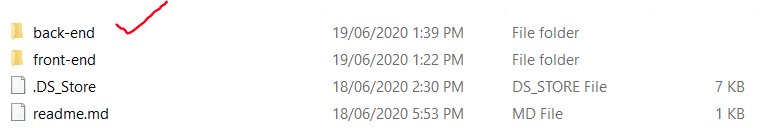


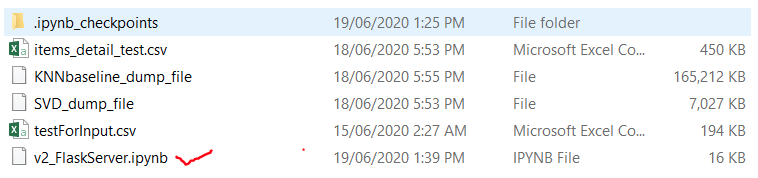

In order to start the service, it needs to run the following code blocks first.
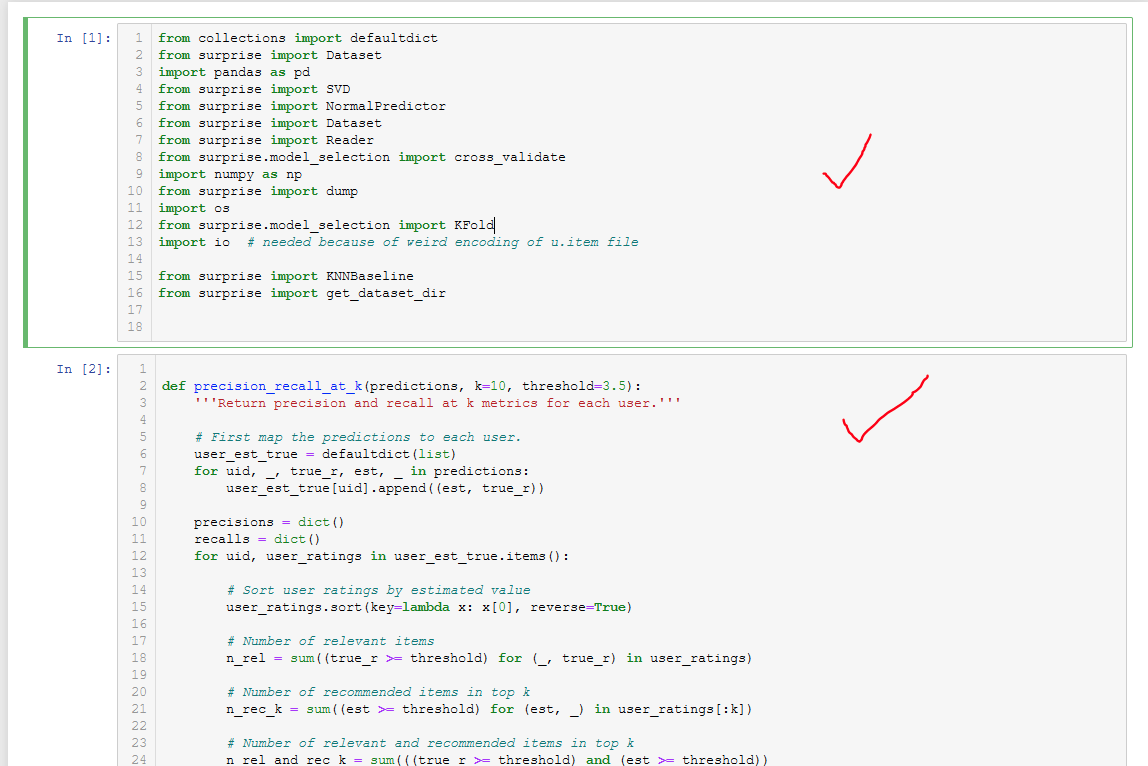

Then load test dataset , prediction and knn algorithms. 
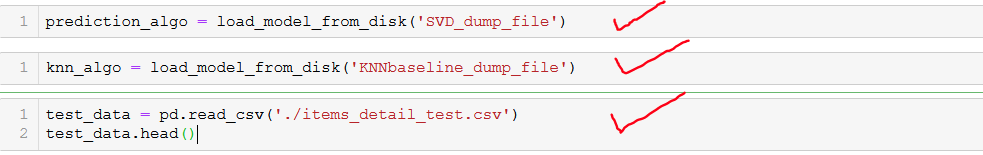

Lastly, run flask server code block to start services , that can response with http requests from front end.
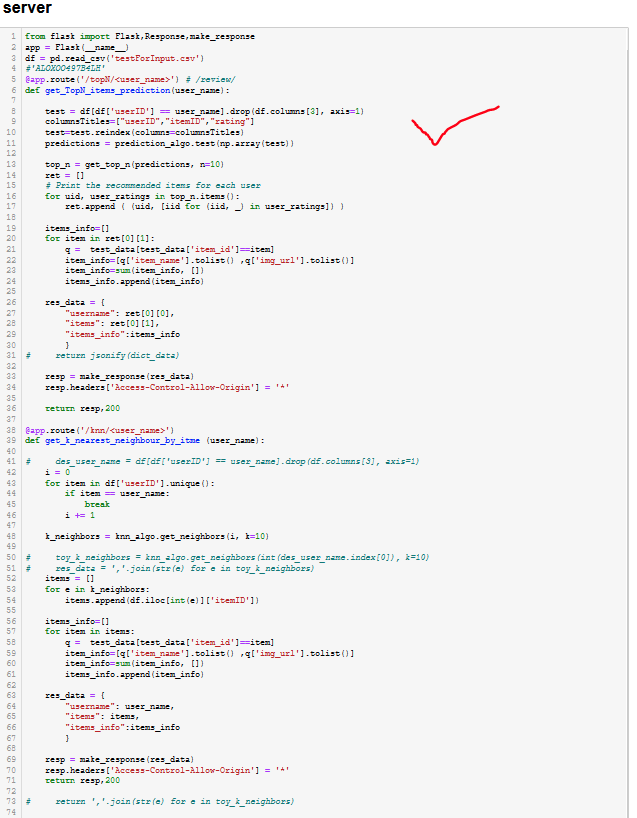

### 11.0 Conclusion

In this project, we undertake an in-depth study for recommender engine. The dataset has been downloaded from web API (Amazon Review Data). In addition to this, we have also web scrapped static web sites to acquire product information for research. 

A standard machine learning process has been followed that including EDA, parameter optimisation with multiple recommender engine models ( 6 models) , and comparison with these models based on their performance measures. There are also two approaches for computing top N recommended items to a user based on his rating information, which is top N items based on model prediction score and k Nearest Neighbours based on item/user similarity.

Then, we have explored the recommender engine system architecture in a distributed and decentralized commercial web app.

Lastly, a simple web app have been developed based on a client server approach, that includes UI design, front and back end code, in order to present the entire working process for a recommender engine dynamically.

However, all the work above are offline and theoretical implementations only, as we don't have real environment for A/B test to adjust and validate the models.


## REFERENCES

http://jmcauley.ucsd.edu/data/amazon/

https://en.wikipedia.org/wiki/Recommender_system

http://surpriselib.com/

https://sifter.org/~simon/journal/20061211.html

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

https://research.ijcaonline.org/volume87/number14/pxc3894033.pdf

http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf

https://surprise.readthedocs.io/en/stable/similarities.html

https://spring.io/

https://github.com/macrozheng/mall

https://en.wikipedia.org/wiki/CAP_theorem
